# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul> The sample size is significantly higher than 30 and is large enough to use central limit theorem.
    The observations are independent because theye are less than 10% of the population (all humans)
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [14]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [15]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
np.random.seed(132)

In [18]:
def ecdf(variable):
    x = sorted(variable)
    y = np.arange(1,len(variable)+1)/len(variable)
    return x,y

1) Is the distribution of body temperatures normal? 
<ul>
<li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.<li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

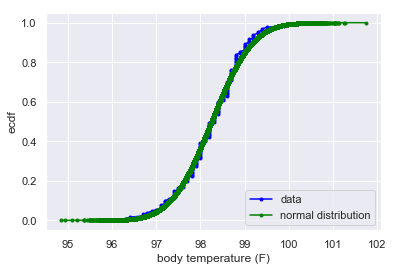

In [19]:
sns.set()
x , y = ecdf(df.temperature)
plt.plot(x,y,marker='.',color = 'blue')
mean = np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean, std, size=100000)
x_normal , y_normal = ecdf(samples)
plt.plot(x_normal,y_normal,marker='.',color='green')
plt.xlabel ('body temperature (F)')
plt.ylabel ('ecdf')
plt.legend(['data','normal distribution'],loc = 'lower right')
plt.show()

### Conclusion: The body temperature data is normally distributed

2)  Is the sample size large? Are the observations independent?
    <li>Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply. 
    <ul>
    ANSWER: The sample size is significantly higher than 30 and is large enough to use central limit theorem.
The observations are independent because theye are less than 10% of the population (all humans)

3) Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?

Hypothesis: True population mean is 98.6

In [20]:
def bs_draw_reps(variable,func,size=1):
    bs_reps=np.empty(size)
    for i in range(size):
        bs_reps[i]=func(np.random.choice(variable,size=len(variable)))
    return bs_reps

In [21]:
sample_mean = np.mean(df.temperature)
print('sample mean is ',sample_mean)
temperature_shifted = df.temperature - sample_mean + 98.6
bs_mean = bs_draw_reps(temperature_shifted,np.mean,10000)
p = np.sum(bs_mean<=sample_mean)/len(bs_mean)
print('p-value is ',p)
#plt.hist(bs_mean,bins=100,normed=True)
#plt.show()
#print(np.mean(bs_mean))

sample mean is  98.2492307692
p-value is  0.0


#### The true population mean is not 98.6

In [22]:
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)
print('sample mean is ',sample_mean)
print('sample std is ',sample_std)
print('I use z-score because the number of samples is more than 30')
z_score = (sample_mean - 98.6)/(sample_std/np.sqrt(np.size(df.temperature)))
print('z-score is ',z_score)
p_zscore = st.norm.cdf(z_score)
print('The probability of having the mean value of ',sample_mean,' based on z-statistic is ', p_zscore)
p_tscore = st.t.cdf(z_score,df=130)
print('The probability of having the mean value of ',sample_mean,' based on t-statistic is ', p_tscore)

sample mean is  98.2492307692
sample std is  0.730357778905
I use z-score because the number of samples is more than 30
z-score is  -5.47592520208
The probability of having the mean value of  98.2492307692  based on z-statistic is  2.17615758294e-08
The probability of having the mean value of  98.2492307692  based on t-statistic is  1.08257052408e-07


#### The results from t and z statistics are very close since number of samples is large enough (more than 30)

4) Draw a small sample of size 10 from the data and repeat both frequentist tests.
    <ul>
    <li> Which one is the correct one to use?
    <li> What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [23]:
np.random.seed(132)
new_sample = np.random.choice(df.temperature,size=10)
new_sample_mean = np.mean(new_sample)
new_sample_std = np.std(new_sample)
print('sample mean is ',new_sample_mean)
print('sample std is ',new_sample_std)
score = (new_sample_mean - 98.6)/(new_sample_std/np.sqrt(np.size(new_sample)))
print('new score is ',score)
p_zscore = st.norm.cdf(score)
print('The probability of having the mean value of ',new_sample_mean,' based on z-statistic is ', p_zscore)
p_tscore = st.t.cdf(score,df=10)
print('The probability of having the mean value of ',new_sample_mean,' based on t-statistic is ', p_tscore)

sample mean is  98.41
sample std is  0.427668095607
new score is  -1.40490432091
The probability of having the mean value of  98.41  based on z-statistic is  0.0800248657722
The probability of having the mean value of  98.41  based on t-statistic is  0.0951718614656


#### The results from t and z statistics are different if the number of samples is not large enough. t-value is more accurate
#### Also, we fail to reject the null hypothesis that the temperature mean is 98.6

5) At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [24]:
bs_mean = bs_draw_reps(df.temperature,np.mean,10000)
confidence_level = 0.68
a,b=np.percentile(bs_mean,[50-100*confidence_level/2,50+100*confidence_level/2])
print('bootstrap approach: If the body temperature is outside [',a,',',b,'], it is considered abnormal')
p = 1-(1-confidence_level)/2
z_score2=st.norm.ppf(p)
print('z-score for 68% confidence interval is the z-score for probability of 0.84 which is', z_score2)
confidence = z_score2*sample_std/np.sqrt(np.size(df.temperature))
print('frequentist approach: If the body temperature is outside [',sample_mean-confidence,',',sample_mean+confidence,'], it is considered abnormal')

bootstrap approach: If the body temperature is outside [ 98.1861538462 , 98.3123076923 ], it is considered abnormal
z-score for 68% confidence interval is the z-score for probability of 0.84 which is 0.99445788321
frequentist approach: If the body temperature is outside [ 98.1855291638 , 98.3129323747 ], it is considered abnormal


6) Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

In [25]:
# I run a permutation test to check if the hypothesis that male and female body temperatures have the same distribution

df_m=df[df.gender=='M']
df_f=df[df.gender=='F']
np.random.seed(132)
def perm_mean_reps(x,y,size=1):
    concat=np.concatenate((x,y))
    perm_replicates=np.empty(size)
    for i in range(size):
        permutation=np.random.permutation(concat)
        x_perm = permutation[:len(x)]
        y_perm = permutation[len(x):]
        perm_replicates[i]=np.mean(x_perm)-np.mean(y_perm)
    return perm_replicates

mean_diff = np.mean(df_f.temperature)-np.mean(df_m.temperature)
perm_replicates=perm_mean_reps(df_f.temperature,df_m.temperature,size=10000)
p = np.sum(perm_replicates>=mean_diff)/len(perm_replicates)
print('p-value of the difference between mean female and male body temperatures as small as ',mean_diff,' is ',p)
print('this probability is less than 0.05, i.e. we reject the null hypothesis and therefore we can conclude that the mean body\
 temperature of women is higher than men\'s. In other words, we need to examine the true normal temperature for men and\
 women separately')

p-value of the difference between mean female and male body temperatures as small as  0.289230769231  is  0.0121
this probability is less than 0.05, i.e. we reject the null hypothesis and therefore we can conclude that the mean body temperature of women is higher than men's. In other words, we need to examine the true normal temperature for men and women separately
